In [1]:
pip install h5py


In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [3]:
pip install tensorflow

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


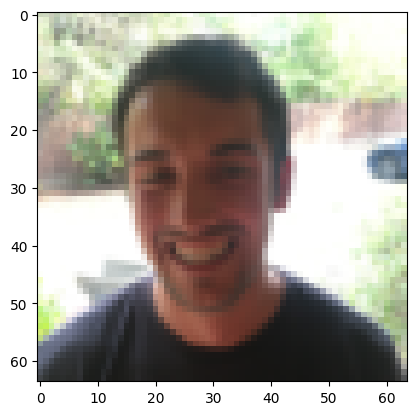

In [5]:
index = 12
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

###  
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

In [6]:
def happyModel():

    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
             tf.keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            ## Conv2D with 32 7x7 filters and stride of 1
             tf.keras.layers.Conv2D(32,(7,7),strides = (1,1)),
            ## BatchNormalization for axis 3
             tf.keras.layers.BatchNormalization(axis=3),
            ## ReLU
             tf.keras.layers.ReLU(),
            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            ## Flatten layer
             tf.keras.layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1, activation='sigmoid')


        ])

    return model

In [7]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)

output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]

comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [8]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [9]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

In [10]:
history  = happy_model.fit(X_train, Y_train, epochs=100, batch_size=16,validation_data=(X_test, Y_test))

Epoch 1/100
38/38 [==============================] - 12s 281ms/step - loss: 0.9163 - accuracy: 0.7333 - val_loss: 0.8032 - val_accuracy: 0.5533
Epoch 2/100
38/38 [==============================] - 10s 272ms/step - loss: 0.2570 - accuracy: 0.8967 - val_loss: 0.4992 - val_accuracy: 0.6600
Epoch 3/100
38/38 [==============================] - 8s 195ms/step - loss: 0.1084 - accuracy: 0.9667 - val_loss: 0.3587 - val_accuracy: 0.8667
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.2000 - accuracy: 0.9183 - val_loss: 0.3246 - val_accuracy: 0.8267
Epoch 5/100
38/38 [==============================] - 4s 101ms/step - loss: 0.1220 - accuracy: 0.9517 - val_loss: 0.2341 - val_accuracy: 0.9200
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0926 - accuracy: 0.9683 - val_loss: 0.1853 - val_accuracy: 0.9467
Epoch 7/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0858 - accuracy: 0.9783 - val_loss: 0.1771 - val_accuracy: 0.93

In [11]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 56ms/step - loss: 0.0809 - accuracy: 0.9600


[0.08087220788002014, 0.9599999785423279]

In [12]:
history.history

{'loss': [0.9163400530815125,
  0.2570410370826721,
  0.10835164040327072,
  0.20002523064613342,
  0.12196101993322372,
  0.09261777251958847,
  0.08580786734819412,
  0.07346722483634949,
  0.10173923522233963,
  0.11761651188135147,
  0.07028651982545853,
  0.06115952879190445,
  0.0920000672340393,
  0.0813274160027504,
  0.07092823833227158,
  0.037511229515075684,
  0.07102925330400467,
  0.10963915288448334,
  0.05903663486242294,
  0.07949940115213394,
  0.04777048900723457,
  0.15813401341438293,
  0.07513654977083206,
  0.09197740256786346,
  0.05304199084639549,
  0.06008533388376236,
  0.09120611101388931,
  0.07425608485937119,
  0.048320721834897995,
  0.3056260645389557,
  0.060353267937898636,
  0.09469835460186005,
  0.04501098021864891,
  0.02216373197734356,
  0.029508832842111588,
  0.038401540368795395,
  0.06298080086708069,
  0.031621478497982025,
  0.03354107216000557,
  0.05858397111296654,
  0.06139539182186127,
  0.008105006068944931,
  0.04206259921193123,
 

<ipython-input-13-7e12320c50f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-13-7e12320c50f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

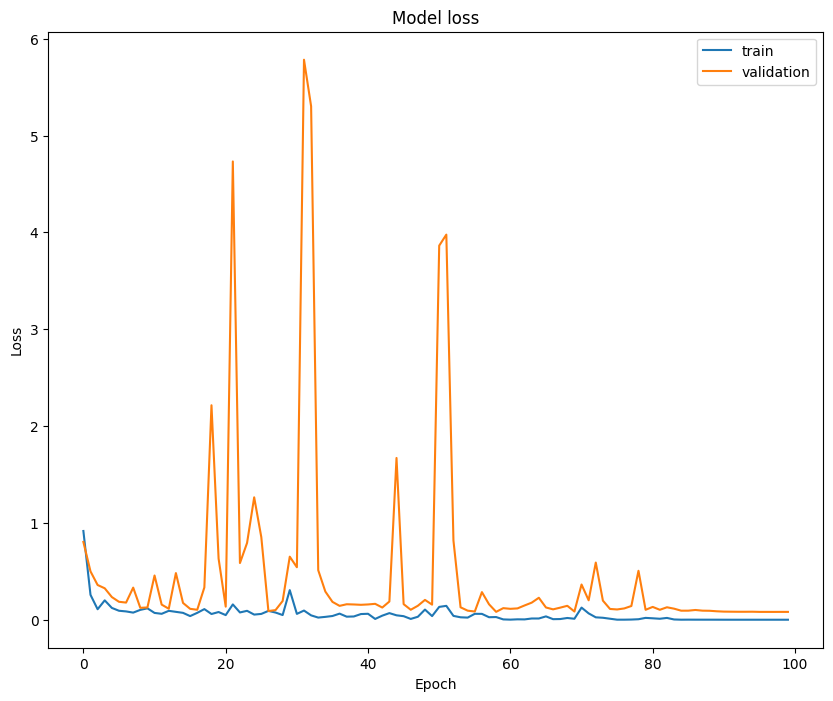

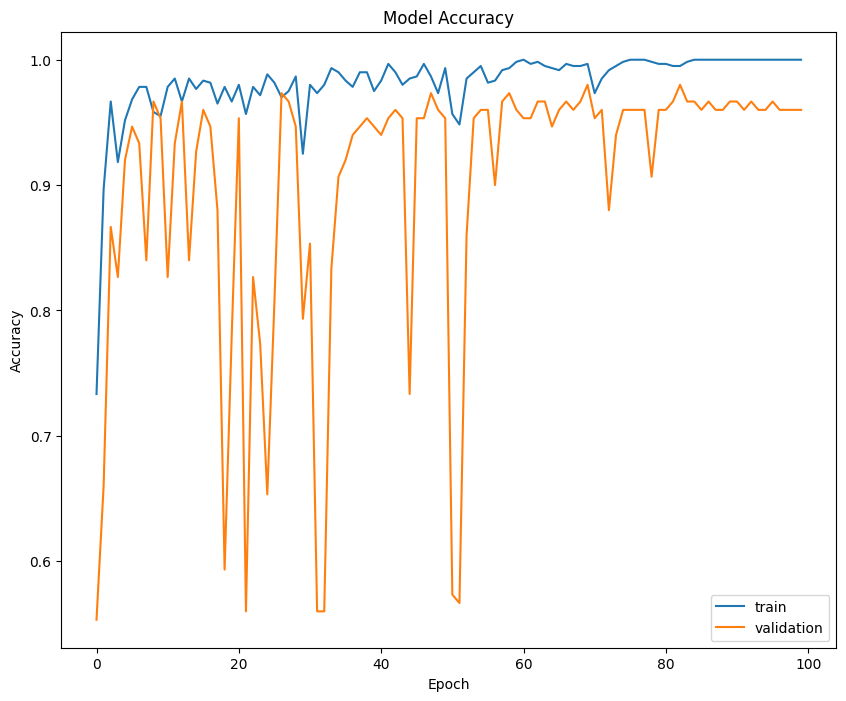

In [13]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(10,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(10,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [14]:
happy_model.save('happy_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [16]:
%%writefile app.py

Writing app.py


In [17]:
! wget -q -O - ipv4.icanhazip.com


35.197.107.67


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.197.107.67:8501

npx: installed 22 in 6.6s
your url is: https://empty-paws-glow.loca.lt
2024-06-16 07:24:07.720840: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 07:24:07.720931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 07:24:07.725342: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-16 07:24:09.453575: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Ten